# Unsupervised Learning

Unsupervised learning is a type of machine learning where the algorithm is trained on unlabeled data without any explicit supervision or guidance. In unsupervised learning, the goal is to discover patterns, relationships, or structures within the data.

Unlike supervised learning, where the algorithm learns from labeled data with known outcomes, unsupervised learning algorithms explore the data without predefined categories or labels. Common tasks in unsupervised learning include clustering, dimensionality reduction, and anomaly detection.

## Clustering

Clustering is the classification of objects into different groups, or more precisely, the partitioning 
of a data set into subsets (clusters), so that the data in each subset (ideally) share some common 
trait - often according to some defined distance measure. It can be used for Customer segmentation, document clustering, image segmentation.

Clustering can be considered the most important unsupervised learning technique; so, as every other problem of this kind, it deals with finding a structure in a collection of  unlabeled data
- Clustering is “the process of organizing objects into groups whose members are similar in some way”
- A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters

When we organize data into clusters such that there is:
- High intra-class similarity
- Low inter-class similarity

<img src='images\good_clustering.jpg' width='500px'>

### K-means
 
K-means is a popular unsupervised machine learning algorithm used for clustering data. The algorithm aims to partition a set of data points into K clusters, where each point belongs to the cluster with the nearest mean.

**K-means clustering steps**
1. Decide on the value K = number of clusters
2. Choose K initial centroids randomly from the data points or set them manually
3. Assign each data point to the nearest centroid, by calculating the distance to each centroid (using euclidean or manhaten) then choosing the closest
4. Recalculate the centroid of each cluster by taking the mean of all data points assigned to that cluster
5. Iterate steps 3 and 4 until the  or a specified maximum number of iterations is reached

**Step Visualized**
1. Decide on the value K = number of clusters
2. Choose K initial centroids randomly from the data points or set them manually
3. Assign each data point to the nearest centroid, forming K clusters
   
<img src='images\kmeans_figure_0_1.png' width='50%'>

4. Recalculate the centroid of each cluster by taking the mean of all data points assigned to that cluster
   
<img src='images\kmeans_figure_0_2.png' width='50%'>

3. Assign each data point to the nearest centroid, forming K clusters
   
<img src='images\kmeans_figure_1_1.png' width='50%'>

4. Recalculate the centroid of each cluster by taking the mean of all data points assigned to that cluster
   
<img src='images\kmeans_figure_1_2.png' width='50%'>

(500, 2)
3


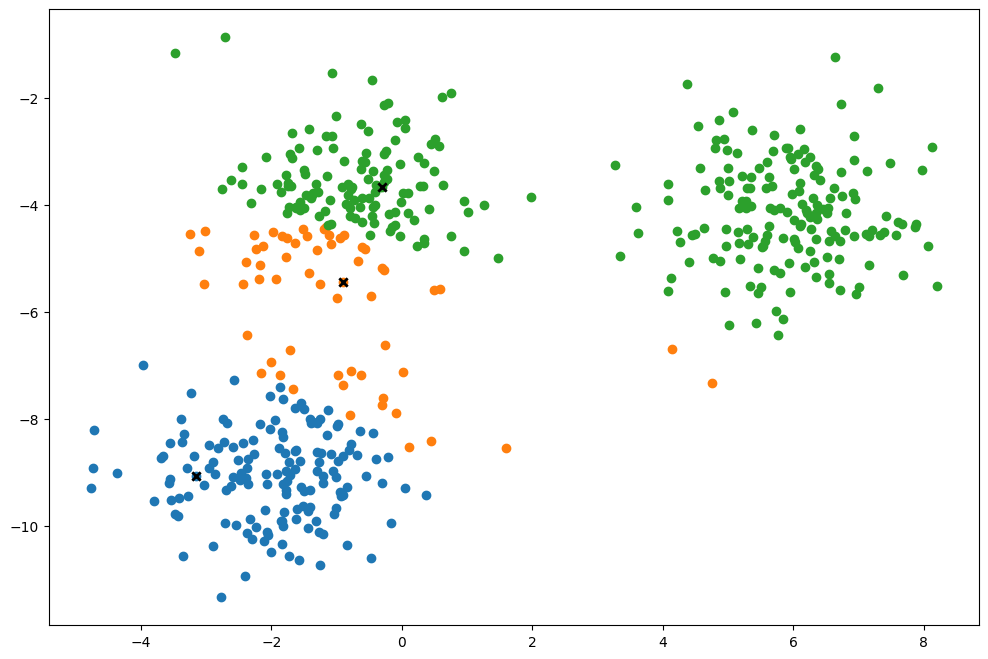

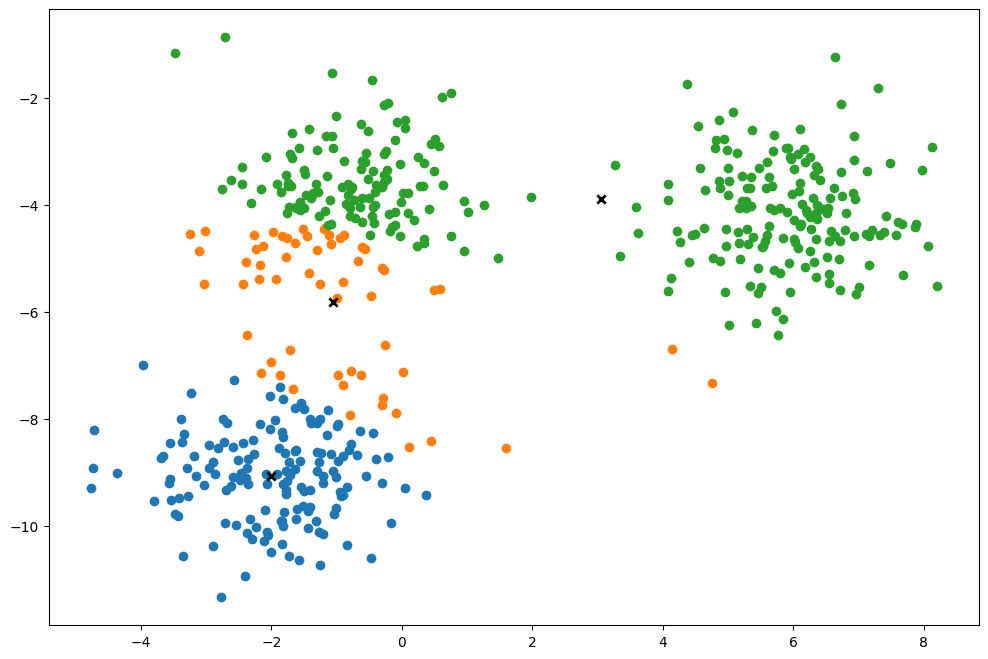

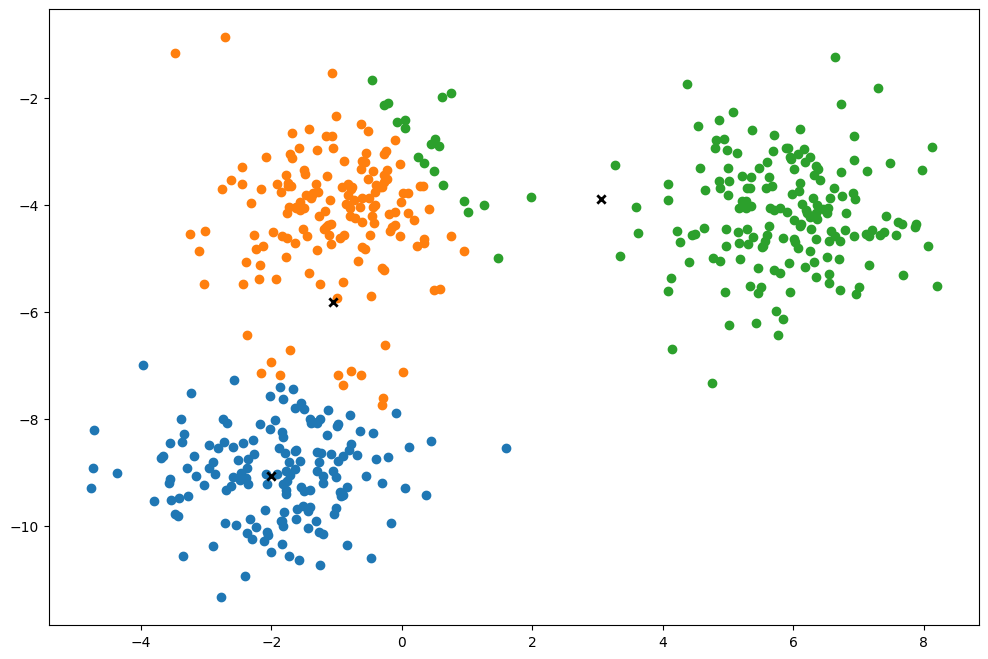

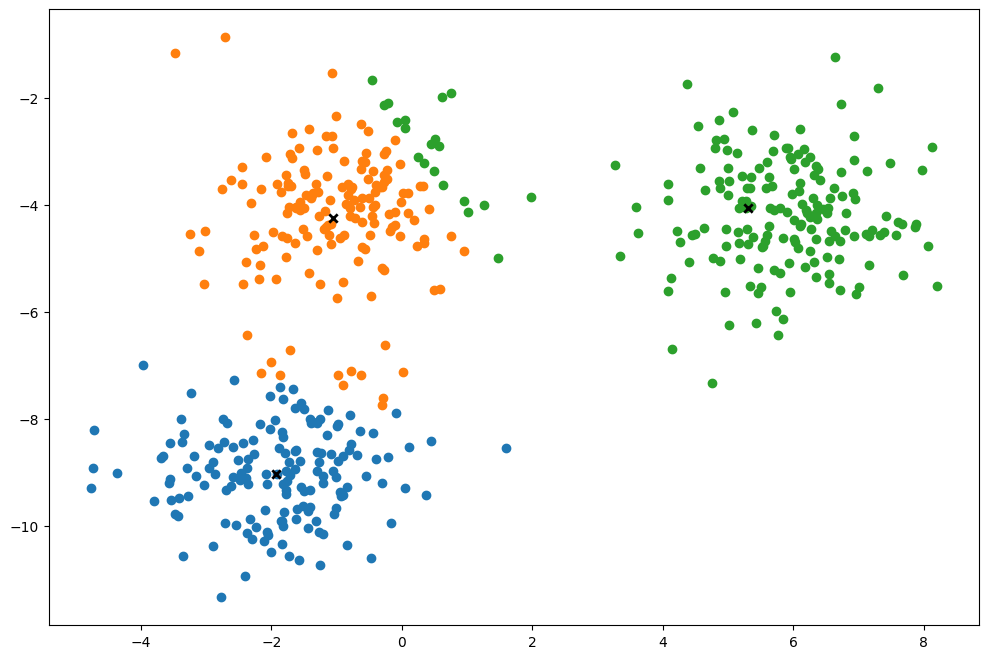

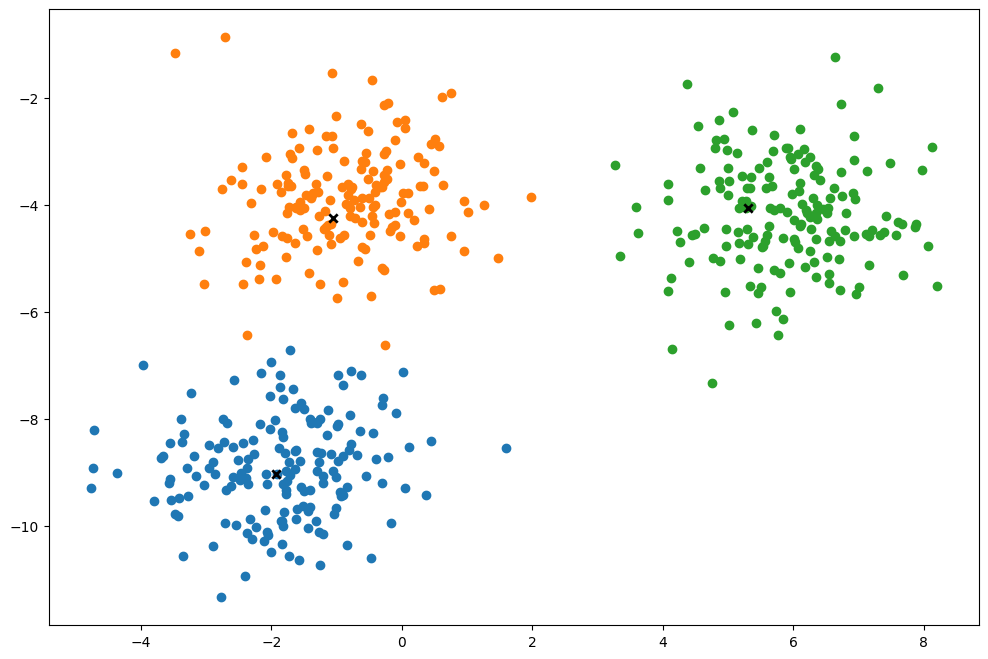

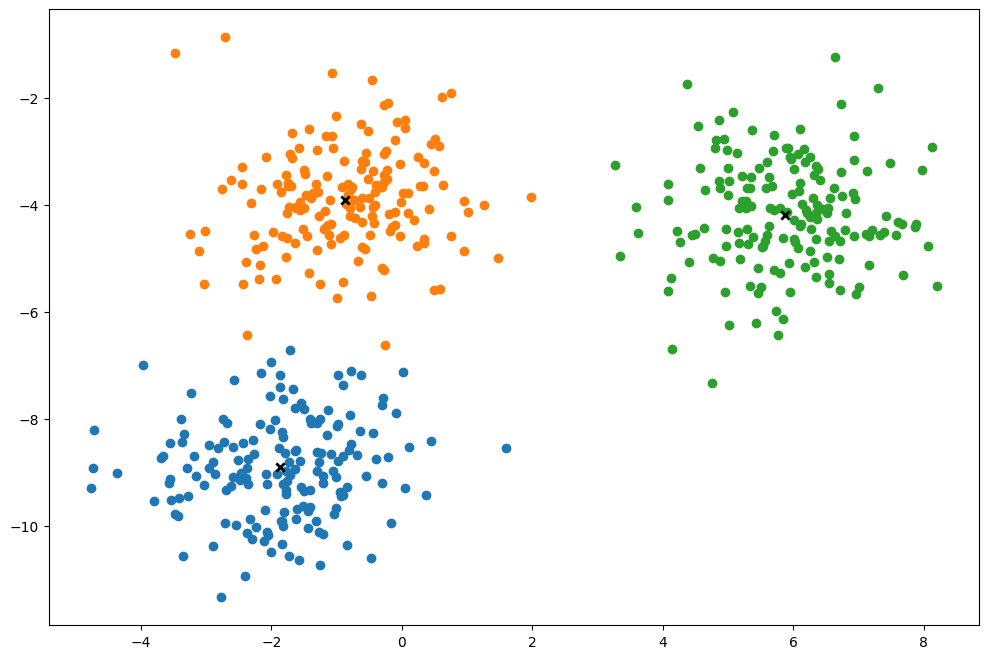

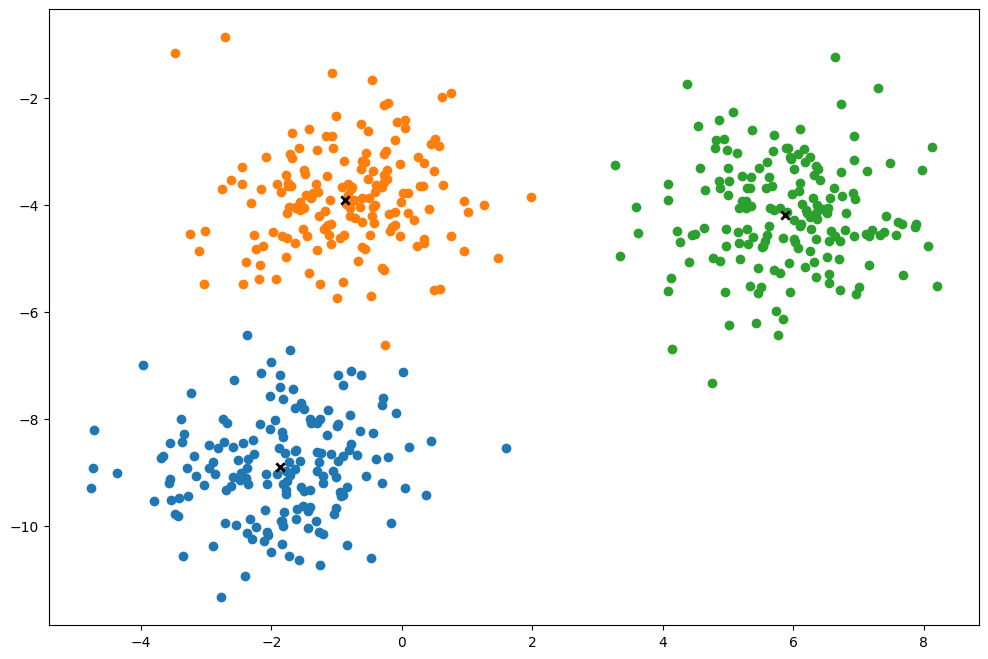

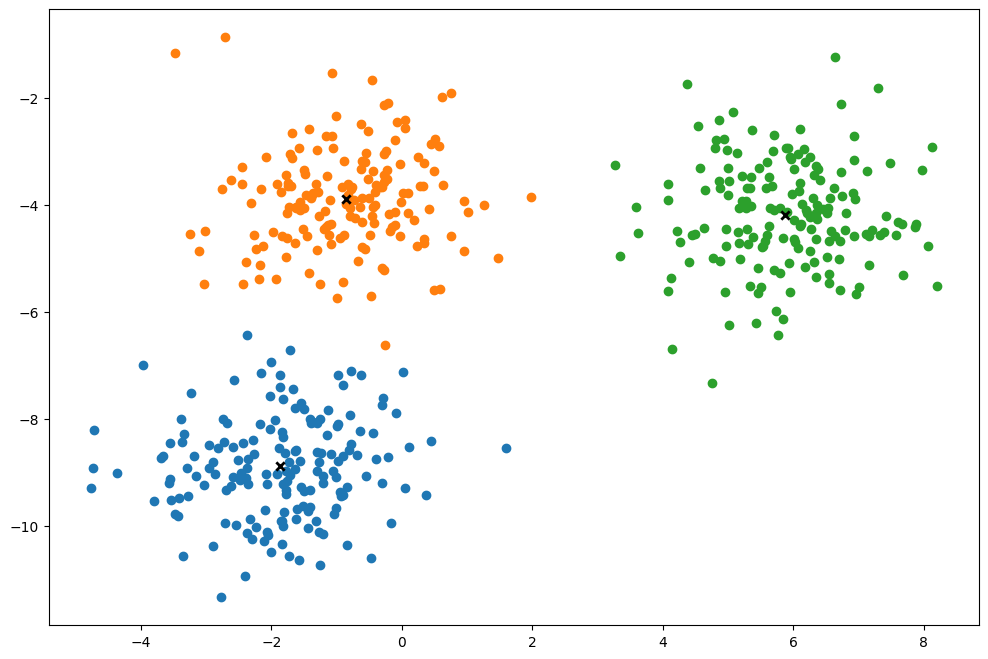

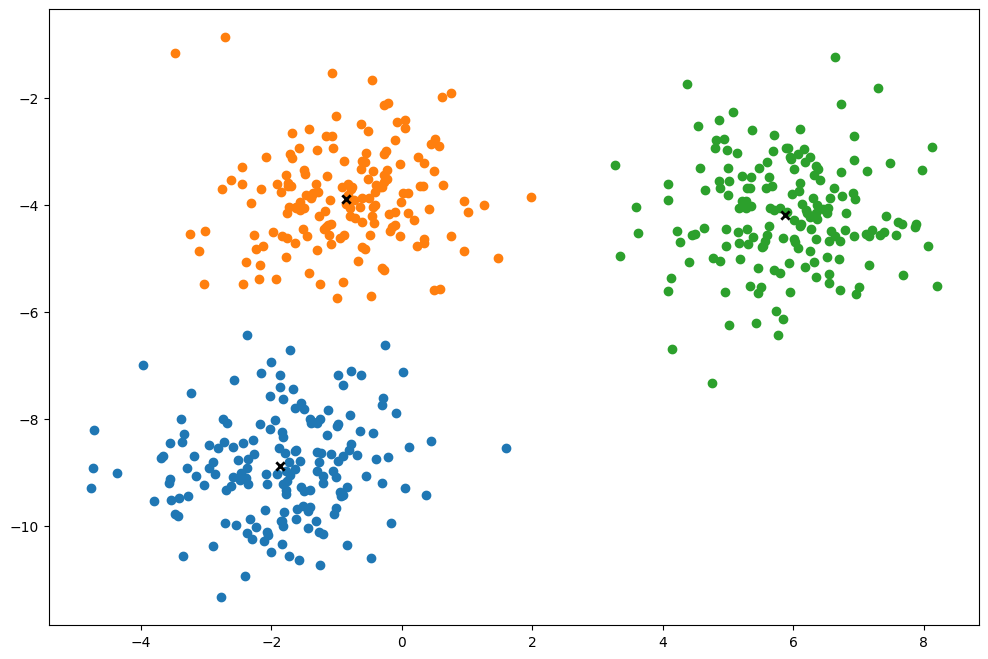

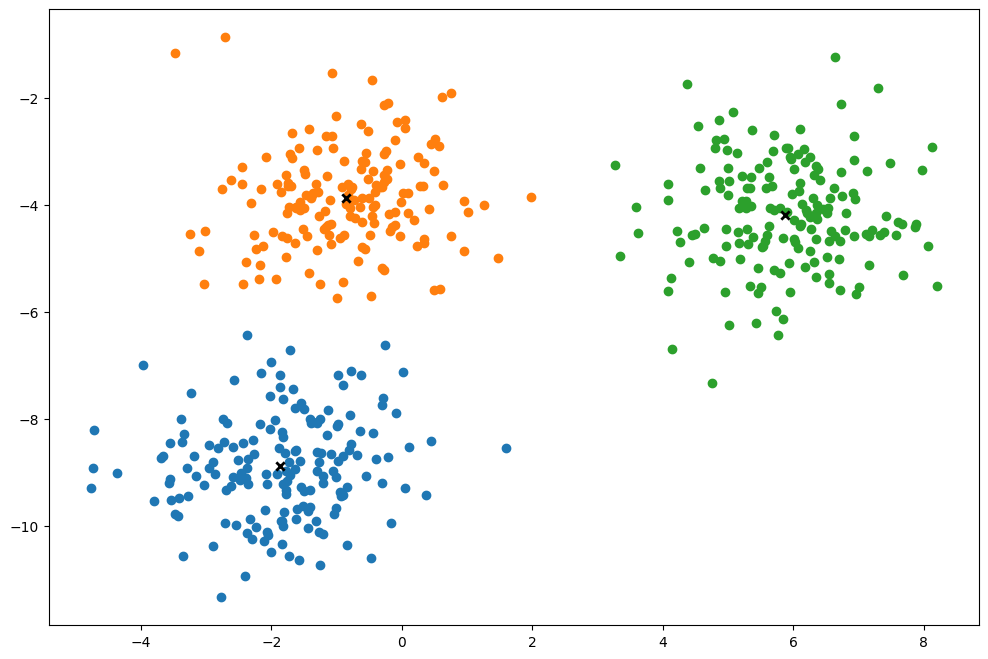

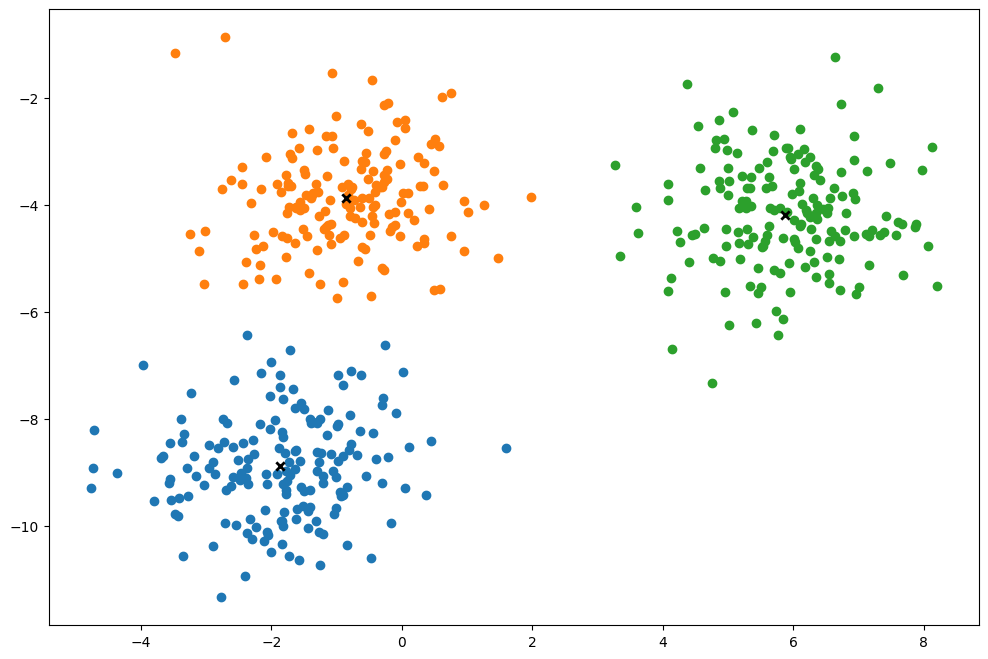

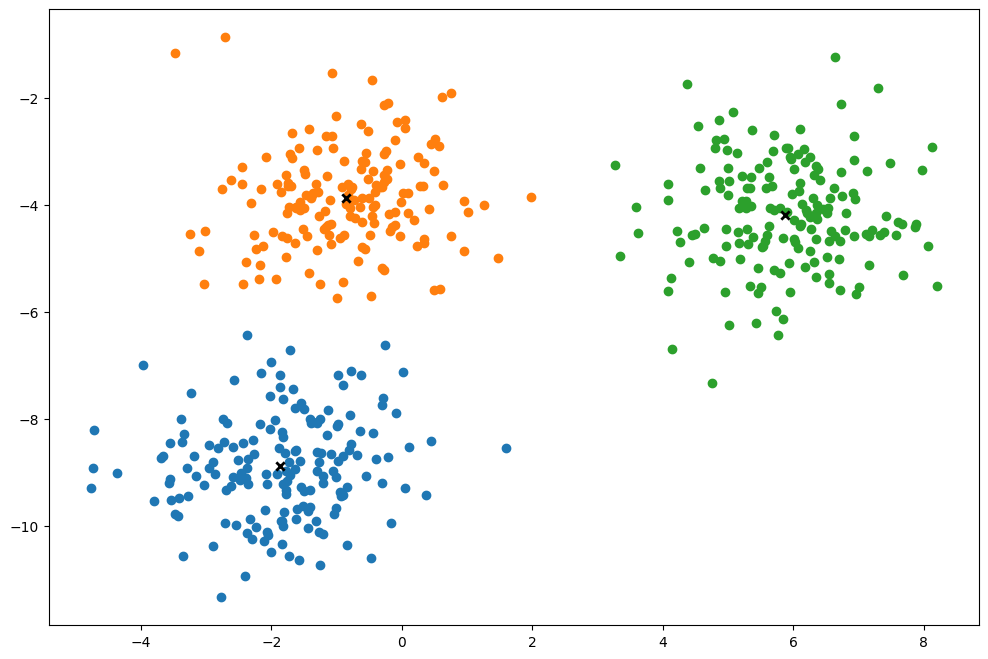

In [1]:
from kmeans import KMeans
import numpy as np

np.random.seed(42)
from sklearn.datasets import make_blobs


X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()

## Anomaly Detection

Anomaly detection is all about spotting things that seem out of the ordinary. Imagine you're looking at a bunch of data, like numbers or events, and you notice something that just doesn't fit with what you'd normally expect. That's an anomaly! The cool thing about anomaly detection is that it helps us catch these oddballs, whether they're unusual data points or unexpected outcomes, by looking for patterns and deviations from those patterns.

Given the variety of problems and techniques, anomaly detection is actually a vast area of data science with many applications. Some of these applications include: fraud detection, cybersecurity applications, analysis of sales or transactional data, identification of rare diseases, monitoring of manufacturing processes, exoplanet search, machine learning preprocessing, and many more. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
X_train = np.load("data/X.npy")
X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

#### Check the dimensions of the dataset

In [4]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of X_val is:', X_val.shape)
print ('The shape of y_val is: ', y_val.shape)

The shape of X_train is: (307, 2)
The shape of X_val is: (307, 2)
The shape of y_val is:  (307,)


Let's visualize the datset, we can use scatter plot because it has only two features

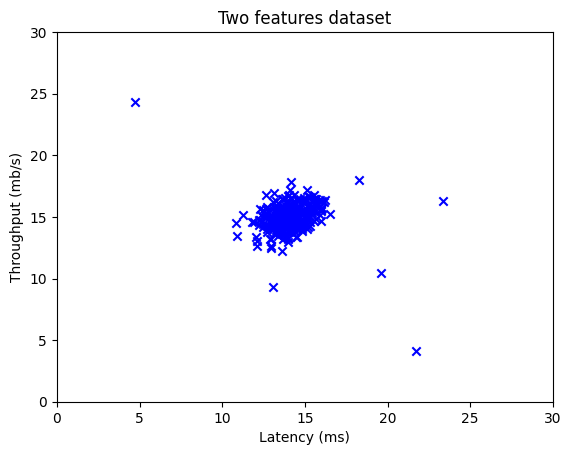

In [5]:
# Create a scatter plot of the data. To change the markers to blue "x",
# we used the 'marker' and 'c' parameters
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b') 

# Set the title
plt.title("Two features dataset")
# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

### Strategy

While there are many algorithms to try, let's go back a bit in time:

    The more rare the instance — the further it is from the center — the more likely it is to be an outlier or an anomaly.

Do you remember this sentence about gaussian distrubtion? How about we utilize this trait, but first we should check, is the the data we have normally distributed in the first place?

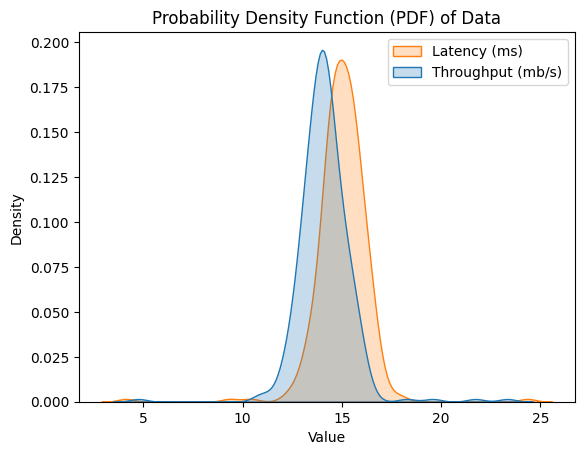

In [6]:
# Plot the density function using KDE
sns.kdeplot(X_train, fill=True)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Data')
plt.legend(['Latency (ms)', 'Throughput (mb/s)'])
plt.show()

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">Nice, we can use the special traits of gaussian distribution to detect anomalies</i>

But what if we have features that are not normally distrbuted?
Let's take take an exponential distribution for example

<Axes: ylabel='Density'>

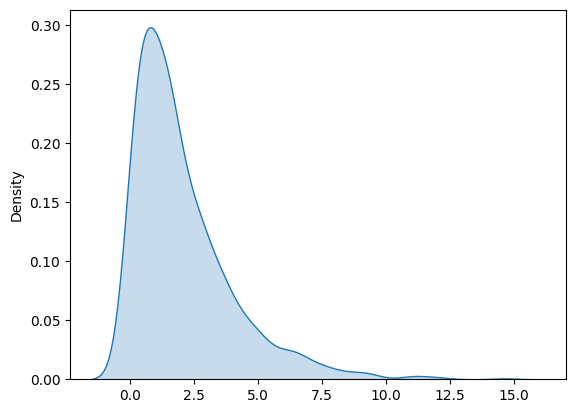

In [7]:
# Parameters for the exponential distribution
lambda_param = 0.5

num_samples = 1000
exponential_samples = np.random.exponential(scale=1/lambda_param, size=num_samples)

# plt.hist(exponential_samples, bins=30, density=True, alpha=0.7, color='blue')

sns.kdeplot(exponential_samples, fill=True)


while this might look like normal distribution, it is not there yet. We can transforming this distribution using different methods. The most common for exponential distribution is applying the natural logarithm `ln` or the logarithmic function `log`

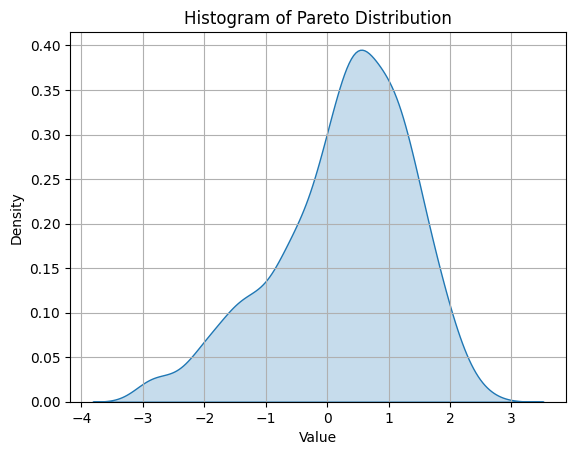

In [8]:
# Plot histogram of the generated samples
# plt.hist(np.log(exponential_samples+0.05), bins=50, density=True, alpha=0.7, color='blue')
sns.kdeplot(np.log(exponential_samples+0.05), fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Pareto Distribution')
plt.grid(True)
plt.show()

while this look my like a normal distribution, it still can be improved. Doing some research, you find out that there is an alogirth called `box-cox` used to convert exponential distributions to normal ones. We can try it by using SciPy library.

<Axes: ylabel='Density'>

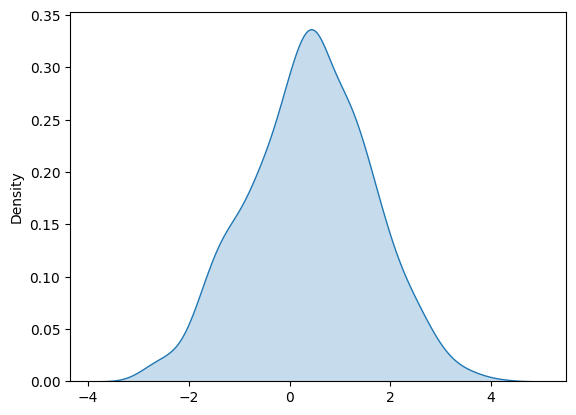

In [9]:
from scipy.stats import boxcox
exponential_samples = boxcox(exponential_samples, 0.3)
sns.kdeplot(exponential_samples, fill=True)

Now this is a guassian distribution !!!

As an ML engineer or data scientist, it will be an important part of your job to look for ways to preprosess and transform the data, to enable the machine learning algorithms to perform better on your dataset.

Back to our dataset, let's detect the anomalies :D

First we need to estimate the parameters of the distributions, i.e., the mean and the variance/std for each features.

In [10]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
print(means.shape, stds.shape)

(2,) (2,)


While we experienced earlier the probability density function of a guassuian diistribution. 

$$ f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2} $$

This equation changes for multivariate gaussian distributions, we will not go into the details of the equation but it is just displayed as additional information:

$$P(\mathbf{x}; \boldsymbol{\mu}, \Sigma) = \frac{1}{(2\pi)^{k/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)$$

In [11]:
from utils import multivariate_gaussian_pdf
p = multivariate_gaussian_pdf(X_train, means, stds**2)
print(p.shape)

(307,)


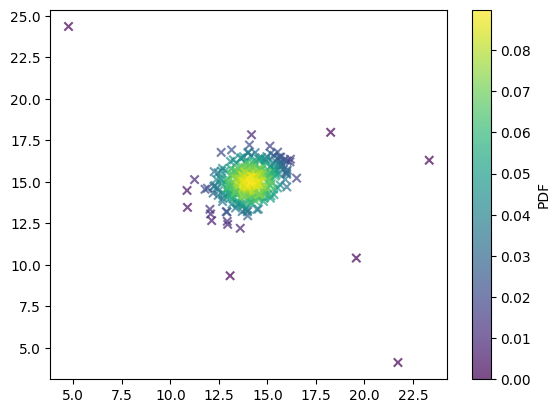

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=p, marker='x', cmap='viridis', alpha=0.7) 
plt.colorbar(label='PDF')

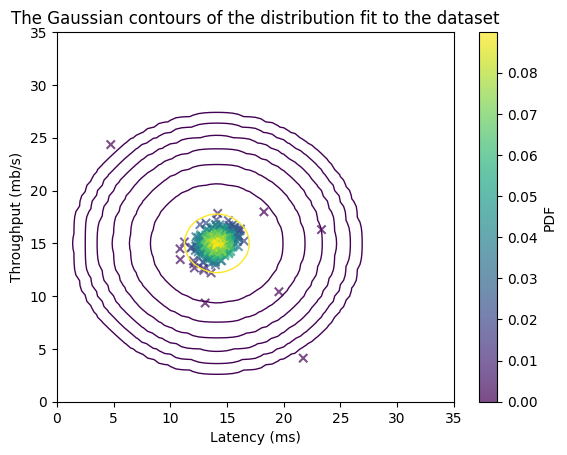

In [13]:
from utils import visualize
visualize(X_train, means, stds**2)


### Detection

<img src='images/SND.png' width='500px'>

In [36]:
def find_outliers(arr, means, stds):
    # Calculate z-scores for each feature
    z_scores = np.abs((arr - means) / stds)
    # Check if any z-score exceeds 3 for any feature
    outliers = np.any(z_scores > 2.8, axis=1)
    return outliers

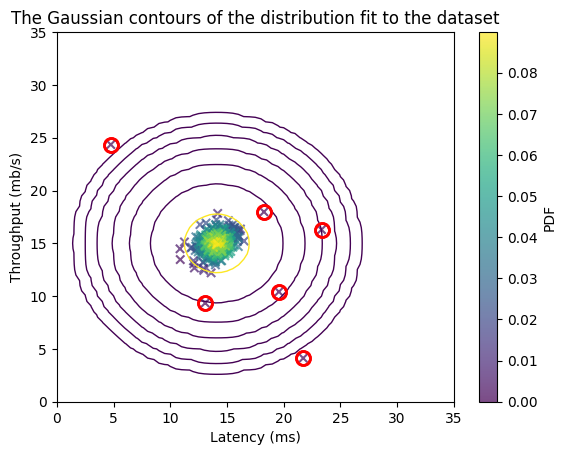

In [15]:
# Find the outliers in the training set 
outliers = find_outliers(X_train, means, stds)

# Visualize the fit
visualize(X_train, means, stds**2)

# Draw a red circle around those outliers
plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro',
         markersize= 10, markerfacecolor='none', markeredgewidth=2)

# Draw a red circle around those outliers
plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro',
         markersize= 10, markerfacecolor='none', markeredgewidth=2)

In [39]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

outliers_val = find_outliers(X_val, means, stds)

accuracy = accuracy_score(y_val, outliers_val*1)
print('accuracy', accuracy)

precision = precision_score(y_val, outliers_val*1)
print('precision', precision)

recall = recall_score(y_val, outliers_val*1)
print('recall', recall)

f1 = f1_score(y_val, outliers_val*1)
print('f1', f1)

accuracy 0.990228013029316
precision 0.875
recall 0.7777777777777778
f1 0.8235294117647058


In [21]:
X_train_multi = np.load("data/X_multivariate.npy")
X_val_multi = np.load("data/X_val_multi.npy")
y_val_multi = np.load("data/y_val_multi.npy")

In [25]:
means_multi = np.mean(X_train_multi, axis=0)
stds_multi = np.std(X_train_multi, axis=0)
print(means_multi.shape, stds_multi.shape)

(11,) (11,)


In [37]:
outliers_val = find_outliers(X_val_multi, means_multi, stds_multi)

accuracy = accuracy_score(y_val_multi, outliers_val*1)
print('accuracy', accuracy)

precision = precision_score(y_val_multi, outliers_val*1)
print('precision', precision)

recall = recall_score(y_val_multi, outliers_val*1)
print('recall', recall)

f1 = f1_score(y_val_multi, outliers_val*1)
print('f1', f1)

accuracy 0.95
precision 0.6923076923076923
recall 0.9
f1 0.782608695652174
